## Modeling distributions

The distributions we have used so far are called empirical distributions because they are based on empirical observations, which are necessarily finite samples.
The alternative is an analytic distribution, which is characterized by a CDF that is a mathematical function. Analytic distributions can be used to model empirical distributions. In this context, a model is a simplification that leaves out unneeded details.

### The exponential distribution

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

$ y ≈ e^{−λx} $

In [1]:
from __future__ import print_function, division
import site
site.addsitedir('./code')
from matplotlib import pyplot as plt
%matplotlib inline

import populations
import numpy as np

import nsfg
import first
import analytic

import thinkstats2
import thinkplot
import scipy.stats as ss

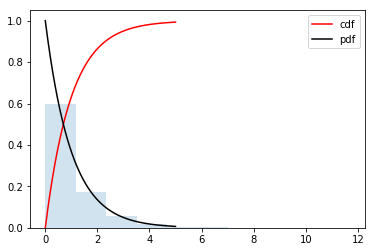

In [56]:
x = np.linspace(0,5, 5000)
cdf_x = ss.expon.cdf(x)
pdf_x = ss.expon.pdf(x)
generated = ss.expon.rvs(loc=0, size=5000, )
plt.plot(x, cdf_x, color='red', label='cdf')
plt.plot(x, pdf_x, color='black', label='pdf')
plt.hist(generated,density=True, histtype='stepfilled',alpha=0.2)
plt.legend()
plt.show()

As an example, we will look at the interarrival time of births. On December 18, 1997, 44 babies were born in a hospital in Brisbane, Australia.1 The time of birth for all 44 babies was reported in the local paper

In [107]:
babby_birth = analytic.ReadBabyBoom(filename='./code/babyboom.dat')
babby_birth.head(5)

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


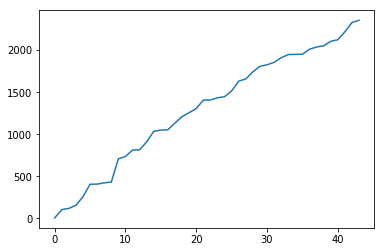

In [61]:
babby_birth.time.plot()

In [228]:
def CDF(df, bins_step=1):
    bins = np.arange(df.min(), df.max(), bins_step)
    hist, bin_e = np.histogram(df, bins=bins, density=True)
    cumsum = np.cumsum(hist, dtype=np.float)
    return cumsum, bin_e

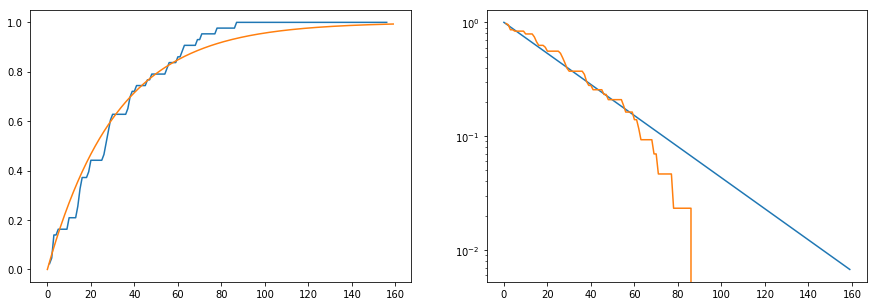

In [332]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
diffs_min = babby_birth.minutes.diff()
diffs_min[0]=0

bins = np.arange(np.floor(diffs_min.min()),np.ceil(diffs_min.max()), 1)
hist, bin_e = np.histogram(diffs_min, bins=bins, density=True)
diffs_cumsum = np.cumsum(hist)
ax[0].plot(bin_e[1:], diffs_cumsum)

x=np.linspace(0,160,160)
generated = ss.expon.cdf(x, scale=32)
ax[0].plot(generated)
ax[1].set_yscale("log")
ax[1].plot(1 - generated)
ax[1].plot(bin_e[1:], 1-diffs_cumsum)

It seems to have the general shape of an exponential distribution, but how can we tell?
One way is to plot the complementary CDF, which is 1 − CDF(x), on a log-y scale. For data from an exponential distribution, the result is a straight line. 
It is not exactly straight, which indicates that the exponential distribution is not a perfect model for this data. Most likely the underlying assumption—that a birth is equally likely at any time of day—is not exactly true.
The parameter, λ, can be interpreted as a rate; that is, the number of events that occur, on average, in a unit of time. In this example, 44 babies are born in 24 hours, so the rate is λ = 0.0306 births per minute. The mean of an exponential distribution is 1/λ, so the mean time between births is 32.7 minutes.


### The normal distribution

The normal distribution, also called Gaussian, is commonly used because it describes many phenomena, at least approximately. The normal distribution is characterized by two parameters: the mean, μ, and standard deviation σ. The normal distribution with μ = 0 and σ = 1 is called the standard normal distribution.

In [2]:
preg = nsfg.ReadFemPreg(dct_file='./code/2002FemPreg.dct', dat_file='./code/2002FemPreg.dat.gz')
weights = preg.totalwgt_lb.dropna()

In [8]:

cums, bins = CDF(weights)
#gen_normal=ss.norm.rvs(loc = weights.mean(), scale=weights.std(), size=1000)
#cums1, bins1 = CDF(gen_normal)

x1 = np.linspace(0,25,200)
gen1 = ss.norm.cdf(x1, loc = weights.mean(), scale=weights.std())

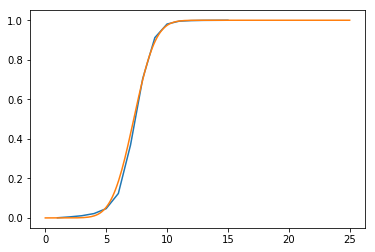

In [9]:
plt.plot(bins[1:], cums)
plt.plot(x1, gen1)

For the normal distribution there is no such transformation, but there is an alternative called a normal probability plot. There are two ways to generate a normal probability plot: the hard way and the easy way. If you are interested in the hard way, you can read about it at https://en.wikipedia. org/wiki/Normal_probability_plot. Here’s the easy way:
1. Sort the values in the sample.
2. From a standard normal distribution (μ = 0 and σ = 1), generate a random sample with the same size as the sample, and sort it.
3. Plot the sorted values from the sample versus the random values.

In [16]:
sorted_w = weights.sort_values()
sample = np.sort(ss.norm.rvs(loc=0, scale=1, size=len(sorted_w)))

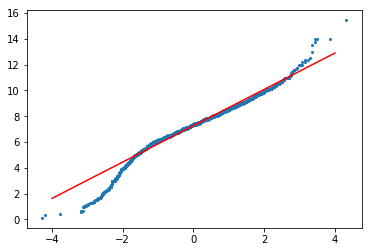

In [37]:
plt.scatter(x=sample, y=sorted_w, marker='.', linewidths=0.1)
x = np.linspace(-4,4, 100)
me = sorted_w.mean()
sigma = sorted_w.std()
plt.plot(x, sigma*x + me, color = 'red')

If the distribution of the sample is approximately normal, the result is a straight line with intercept mu and slope sigma.Both curves match the model near the mean and deviate in the tails. The heaviest babies are heavier than what the model expects, and the lightest babies are lighter. When we select only full term births, we remove some of the lightest weights, which reduces the discrepancy in the lower tail of the distribution.


### The lognormal distribution

If the logarithms of a set of values have a normal distribution, the values have a lognormal distribution. The CDF of the lognormal distribution is the same as the CDF of the normal distribution, with log x substituted for x.    
$CDF_{lognormal}(x) = CDF_{normal}(log x)$
he parameters of the lognormal distribution are usually denoted μ and σ. But remember that these parameters are not the mean and standard deviation; the mean of a lognormal distribution is exp(μ + σ2/2) and the standard deviation is ugly (see http://wikipedia.org/wiki/Log-normal_ distribution).
If a sample is approximately lognormal and you plot its CDF on a log-x scale, it will have the characteristic shape of a normal distribution. To test how well the sample fits a lognormal model, you can make a normal probability plot using the log of the values in the sample

### The Pareto distribution

The Pareto distribution is named after the economist Vilfredo Pareto, who used it to describe the distribution of wealth (see http://wikipedia. org/wiki/Pareto_distribution). Since then, it has been used to describe phenomena in the natural and social sciences including sizes of cities and towns, sand particles and meteorites, forest fires and earthquakes.
The CDF of the Pareto distribution is:    
   $ CDF(x)=1 - (x / x_{m})^{-alpha}$    
   The parameters xm and α determine the location and shape of the distribution. $x_m$ is the minimum possible value.
   There is a simple visual test that indicates whether an empirical distribution fits a Pareto distribution: on a log-log scale, the CCDF looks like a straight line.

In [60]:
pareto_cdf = ss.pareto.cdf(np.linspace(0,10, 50), scale=1, b=2)
pareto_pdf = ss.pareto.pdf(np.linspace(0,10, 50), scale=1, b=2)

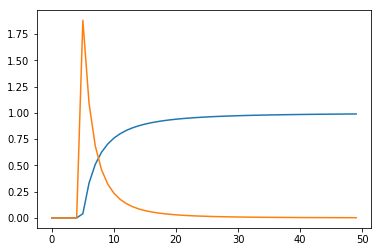

In [61]:
plt.plot(pareto_cdf)
plt.plot(pareto_pdf)

In [156]:
pop_data.std()

81751.11697560384

In [63]:
pop_data = populations.ReadData(filename='./code/PEP_2012_PEPANNRES_with_ann.csv')

In [138]:
low_pop = pop_data[pop_data <= 90000]
high_pop = pop_data[pop_data > 90000]
print(len(low_pop), len(high_pop))

19179 336


1.0

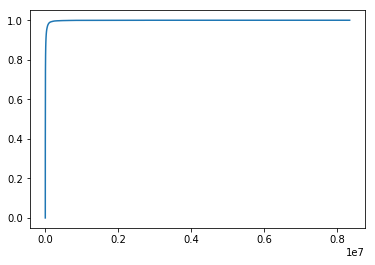

In [71]:
cum_pop, cdf_pop = CDF(pop_data)
plt.plot(cdf_pop[1:], cum_pop)

There is a simple visual test that indicates whether an empirical distribution fits a Pareto distribution: on a log-log scale, the **CCDF** looks like a straight line.
If you plot the CCDF of a sample from a Pareto distribution on a linear scale, you expect to see a function like:    
$y=(x/x_m)^{−α}$

Taking the log of both sides yields:
$logy ≈ −α(log_x−log_{xm})$

So if you plot log y versus log x, it should look like a straight line with slope
−α and intercept α log xm.

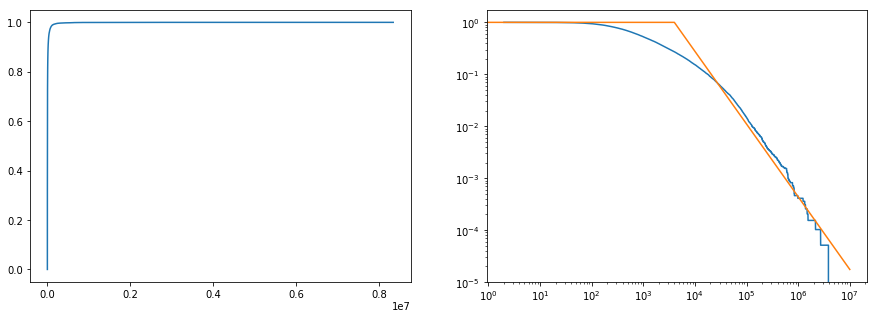

In [157]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

ax[0].plot(cdf_pop[1:], cum_pop)
#ax[0].set_yscale("log")

ax[1].plot(cdf_pop[1:], 1 - cum_pop)
ax[1].set_yscale("log")
ax[1].set_xscale("log")

x_pareto = np.linspace(0, 1e7, 5000)
gen_pareto = ss.pareto.cdf(x_pareto, scale=4000, b=1.4)
ax[1].plot(x_pareto, 1 - gen_pareto)

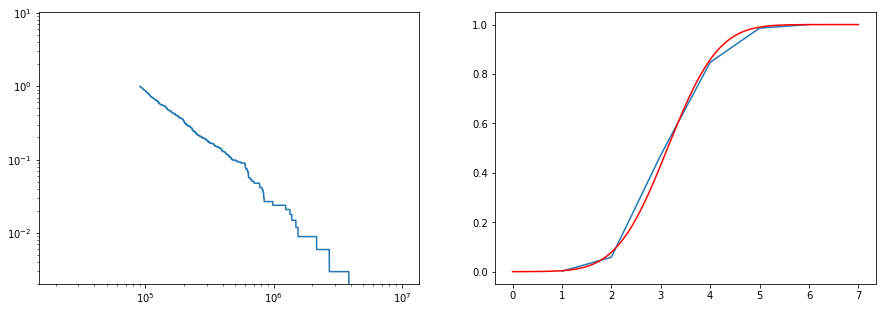

In [251]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
l_cum, l_bins = CDF(low_pop)
h_cum, h_bins = CDF(high_pop)

ax[0].plot(h_bins[1:], 1-h_cum)
ax[0].set_yscale("log")
ax[0].set_xscale("log")


log_pop = np.log10(pop_data)
log_cum, log_bins = CDF(log_pop, bins_step=1)
ax[1].plot(log_bins[1:],log_cum )

mu, std = log_pop.mean(), log_pop.std()
x_n = np.linspace(0, 7, num=5000)
nn = ss.norm.cdf(x_n, loc=mu, scale=std)
ax[1].plot(x_n, nn, color='red')

In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range?

0.3420946829459531


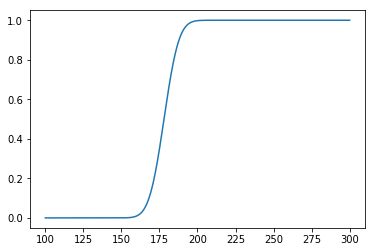

In [264]:
male_dist = np.linspace(100, 300, 5000)

male_cdf = ss.norm(loc=178, scale=7.7)
plt.plot(male_dist, male_cdf.cdf(male_dist))
print(male_cdf.cdf(185.4) - male_cdf.cdf(177.8))

To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

1.3521832320506633e-08

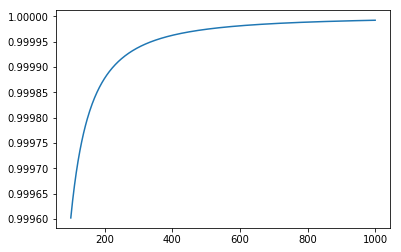

In [277]:
x = np.linspace(100, 1000, 500)

par = ss.pareto(scale=1, b=1.7)

plt.plot(x, par.cdf(x))
par.cdf(1000) - par.cdf(999)

In [285]:
print(par.mean())
print(par.cdf(par.mean()))
(1 - par.cdf(1000)) * 7e9

2.428571428571429
0.778739697565288


55602.976430479954

How tall do we expect the tallest person to be?

In [294]:
# One way to solve this is to search for a height that we
# expect one person out of 7 billion to exceed.
print(par.sf(600000) * 7e9    )
# Another way is to use `ppf`, which evaluates the "percent point function", which
# is the inverse CDF.  So we can compute the height in meters that corresponds to
# the probability (1 - 1/7e9 - 7 billions people).
par.ppf(1 - 1/7e9)

52.75224105741645


618349.6106759505

The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let’s look at some data.

In [297]:
import hinc
df = hinc.ReadData(filename='./code/hinc06.csv')

In [298]:
df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


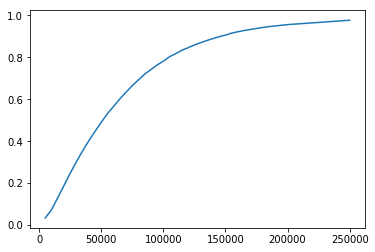

In [307]:
inc, ps = df.income, df.ps.values
plt.plot(inc, ps)


/Users/kiryl_zayets/anaconda3/envs/wrangling/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/kiryl_zayets/anaconda3/envs/wrangling/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


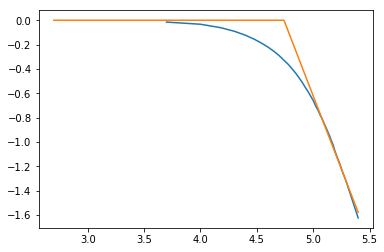

In [357]:
plt.plot(np.log10(inc), np.log10(1-ps))

xp=np.linspace(0, 250000, 500)
pc = ss.pareto.cdf(xp, b=2.4,scale=55000)

plt.plot(np.log10(xp), np.log10(1-pc))


In [ ]:
• empirical distribution: The distribution of values in a sample.
• analytic distribution: A distribution whose CDF is an analytic func-
tion.
• model: A useful simplification. Analytic distributions are often good models of more complex empirical distributions.
• interarrival time: The elapsed time between two events.
• complementary CDF: A function that maps from a value, x, to the
fraction of values that exceed x, which is 1 − CDF(x).
• standard normal distribution: The normal distribution with mean 0
and standard deviation 1.
• normal probability plot: A plot of the values in a sample versus random values from a standard normal distribution.